<a href="https://colab.research.google.com/github/economicactivist/DS-Unit-2-Build/blob/master/Mountain_Scott_ModelTraining_BuildWeek_Unit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

------------------

###Schema diagram for csv files

In [0]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


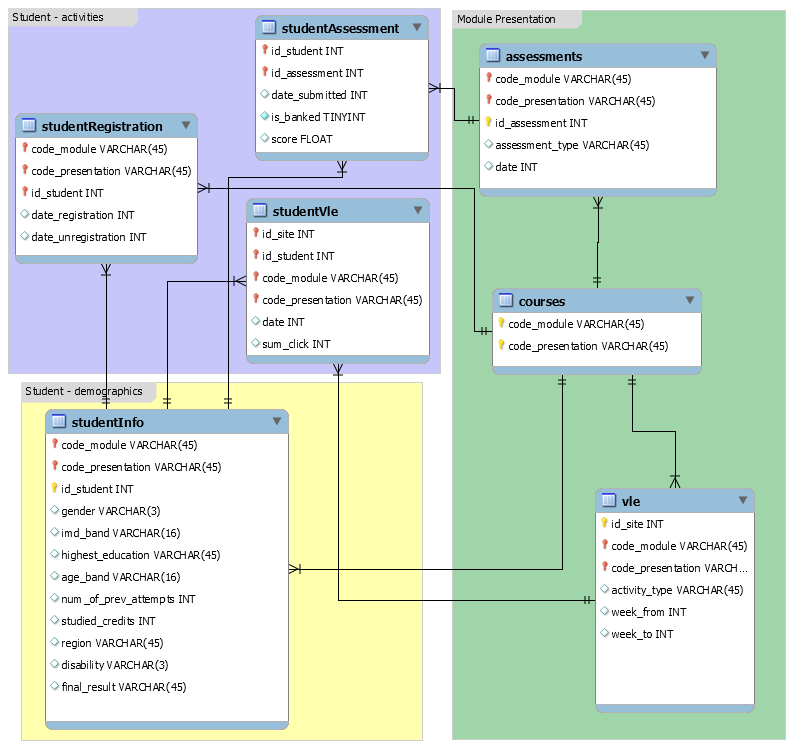

In [0]:
from IPython.display import Image, display
display(Image(filename='/content/drive/My Drive/Datasets/Images/schema_diagram.png'))

In [0]:
#https://analyse.kmi.open.ac.uk/open_dataset#description

<h3>My chosen dataset has different csv files that describe different aspects of the student and their interacations with the LMS.  The LMS is referred to as a VLE (virtual learning envrionment)in the dataset</h3>

A chief goal of learning analytics is to assess academic performance, so there <b>two</b> variables that would be of interest:  

1. "final_result": a categorical variable in the StudentInfo csv and
2. "score" a continuous variable in the studentAssessment csv

I've decided to choose "final_result" as my target variable because, as the name implies, it represents values that account for students overall performance in an academic period.  The "score" variable, on the other hand, only has values that represent performance on different assessments within an academic period.  Because different assessments have different weights, interpreting the meaning of scores with reference to other data would be more complicated. 


Personal Notes: 
B - February
J - October

The imd_band variable relates to the Index of Multiple deprevation, which is the UK government's way of measuring <a href = "https://www.arcgis.com/apps/Cascade/index.html?appid=3c16c360b5704192a550f844b13ffb0a"> how deprived different neighborhoods are</a>, compared to one another. More info <a href = " https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/579151/English_Indices_of_Deprivation_2015_-_Frequently_Asked_Questions_Dec_2016.pdf"> here</a>. 

"[The IMD] groups neighbourhoods according to whether they are among the
most deprived: 1 per cent; 2 per cent; 3-5 per cent; 5 to 10 per cent; 10 to 20
per cent; and 20 to 30 per cent nationally"

In [0]:
import pandas as pd
import numpy as np

In [0]:
!pip install category_encoders==2.*

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report
import xgboost as xgb
#!pip install category_encoders==2.*
#OneHotEncoder(use_cat_names=True)


In [0]:
pd.read_csv('/content/drive/My Drive/Datasets/Build_2/studentInfo.csv')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [0]:
grades = pd.read_csv('/content/drive/My Drive/Datasets/Build_2/studentInfo.csv')


In [0]:
num_clicks = pd.read_csv('/content/drive/My Drive/Datasets/Build_2/studentVle.csv')

In [0]:
num_clicks.head(30)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400.0,546652.0,-10.0,4.0
1,AAA,2013J,28400.0,546652.0,-10.0,1.0
2,AAA,2013J,28400.0,546652.0,-10.0,1.0
3,AAA,2013J,28400.0,546614.0,-10.0,11.0
4,AAA,2013J,28400.0,546714.0,-10.0,1.0
5,AAA,2013J,28400.0,546652.0,-10.0,8.0
6,AAA,2013J,28400.0,546876.0,-10.0,2.0
7,AAA,2013J,28400.0,546688.0,-10.0,15.0
8,AAA,2013J,28400.0,546662.0,-10.0,17.0
9,AAA,2013J,28400.0,546890.0,-10.0,1.0


In [0]:
num_clicks.date.describe()

count    1.702389e+06
mean     8.714535e+01
std      7.422932e+01
min     -2.400000e+01
25%      2.200000e+01
50%      6.700000e+01
75%      1.480000e+02
max      2.690000e+02
Name: date, dtype: float64

In [0]:
num_clicks.date = num_clicks.date+25 #to date column to start 1 for log transformation

In [0]:
num_clicks.date.describe()

count    1.702389e+06
mean     1.121454e+02
std      7.422932e+01
min      1.000000e+00
25%      4.700000e+01
50%      9.200000e+01
75%      1.730000e+02
max      2.940000e+02
Name: date, dtype: float64

##date – the date of student’s interaction with the material measured as the **number of days since the start of the module-presentation**.


###Some IDs from "id_student" have multiple entries. I think a groupby statement will help to sum them all together per observation.  <br/> <b>Note:</b> there are less unique IDs in StudentVLE.csv than there are in StudentInfo.csv, so a left_join on StudentInfo (assigned to the dataframe "grades") will leave IDs with NaN values for joins that don't have shared columns.  Additionally, StudentVLE.csv ("num_clicks") only contains data from two modules: AAA and BBB whereas "grades" has seven modules: 'AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'. 



In [0]:
num_clicks = num_clicks.groupby(["id_student", "code_module", "code_presentation"] ).agg({'date':'sum', 'sum_click':'sum'}).reset_index()



In [0]:
grades.columns, num_clicks.columns

(Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
        'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
        'studied_credits', 'disability', 'final_result'],
       dtype='object'),
 Index(['id_student', 'code_module', 'code_presentation', 'date', 'sum_click'], dtype='object'))

In [0]:
num_clicks.id_student.nunique(), grades.id_student.nunique()   #same students in both datasets

(7183, 28785)

In [0]:
grades.shape, num_clicks.shape

((32593, 12), (7354, 5))

In [0]:
grades = grades.merge(num_clicks, how="left", on=["id_student", "code_module", "code_presentation"])

In [0]:
grades.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 14 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
date                    7354 non-null float64
sum_click               7354 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.7+ MB


In [0]:
grades = grades.dropna(axis=0).drop(['id_student', 'studied_credits'], axis=1) #, subset=['imd_band','age_band']).fillna(0)
 #drop high_cardinality column

###Dropping id_student leads to a 2-4% drop in accuracy.  EDA performed on a [separate notebook](https://colab.research.google.com/drive/1ZdBb7GEdvugZxi5o4o8_2WOp-gzWcLfb) determined there were associations between "id_student" and the "code_module" and "age_band" columns.   However, I will still drop the column because I want to create a more general-purpose demo model in which it wouldn't be meaningful for a user to input a random id number to make a prediction about academic performance. 

I also dropped "studied_credits" because it did not have a significant effect on accuracy (an even improved accuracy using XGBoost). 

In [0]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7276 entries, 0 to 8655
Data columns (total 12 columns):
code_module             7276 non-null object
code_presentation       7276 non-null object
gender                  7276 non-null object
region                  7276 non-null object
highest_education       7276 non-null object
imd_band                7276 non-null object
age_band                7276 non-null object
num_of_prev_attempts    7276 non-null int64
disability              7276 non-null object
final_result            7276 non-null object
date                    7276 non-null float64
sum_click               7276 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 739.0+ KB


In [0]:
grades.tail(100)

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,final_result,date,sum_click
8540,BBB,2014J,F,North Western Region,HE Qualification,0-10%,0-35,0,N,Pass,13118.0,684.0
8541,BBB,2014J,M,Scotland,HE Qualification,40-50%,35-55,1,Y,Withdrawn,2721.0,146.0
8542,BBB,2014J,F,South West Region,Lower Than A Level,50-60%,35-55,0,N,Pass,12880.0,514.0
8543,BBB,2014J,F,South West Region,Lower Than A Level,0-10%,35-55,0,Y,Withdrawn,2048.0,88.0
8544,BBB,2014J,M,Ireland,A Level or Equivalent,90-100%,0-35,0,N,Pass,4509.0,131.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8651,BBB,2014J,F,South Region,HE Qualification,40-50%,35-55,0,N,Pass,7216.0,217.0
8652,BBB,2014J,F,Scotland,HE Qualification,80-90%,35-55,0,N,Pass,23066.0,1030.0
8653,BBB,2014J,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,Y,Pass,4889.0,223.0
8654,BBB,2014J,F,Wales,Lower Than A Level,50-60%,35-55,0,N,Fail,7104.0,364.0


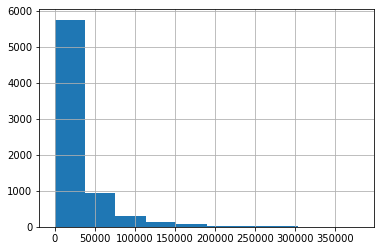

In [0]:
grades.date.hist()

In [0]:
 
grades.date = np.log(grades.date).round()

In [0]:
grades.date.describe().loc["min":"max"]

min     3.0
25%     8.0
50%     9.0
75%    10.0
max    13.0
Name: date, dtype: float64

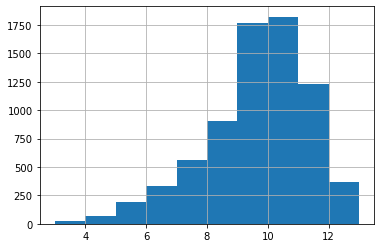

In [0]:
grades.date.hist() #creates a scale of 1 to 13 of level of student interaction

In [0]:
grades.date = grades.date-3 #creates a scale of 0 to 10 of level of student interaction

In [0]:
grades.date.describe().loc["min":"max"]

min     0.0
25%     5.0
50%     6.0
75%     7.0
max    10.0
Name: date, dtype: float64

min        1.0
25%      157.0
50%      390.5
75%      813.0
max    16440.0
Name: sum_click, dtype: float64


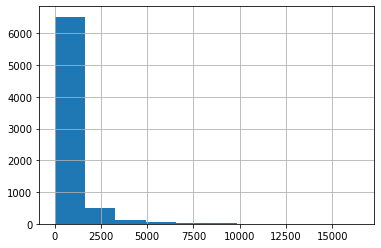

In [0]:
print(grades.sum_click.describe().loc["min":"max"])
grades.sum_click.hist()

In [0]:
grades.sum_click = np.log(grades.sum_click).round()

min     0.0
25%     5.0
50%     6.0
75%     7.0
max    10.0
Name: sum_click, dtype: float64


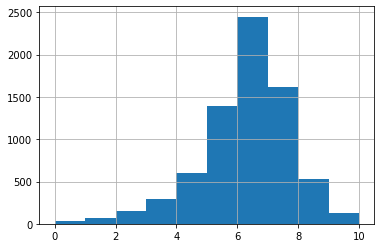

In [0]:
print(grades.sum_click.describe().loc["min":"max"])
grades.sum_click.hist()  #so a 0-10 scale can be used for the interactive app

In [0]:
def data_entry_check(df):
  """function for checking for data entry errors in 
  categorical values in all columns of a dataframe
  by placcing all unique values in a list of arrays that
  can be scanned over quickly"""
  a = []
  for col in df:
    if df[col].dtype.name not in ['int64', 'float64'] :
      a.append(df[col].unique())
  return a


In [0]:
data_entry_check(grades)

[array(['AAA', 'BBB'], dtype=object),
 array(['2013J', '2014J', '2013B', '2014B'], dtype=object),
 array(['M', 'F'], dtype=object),
 array(['East Anglian Region', 'Scotland', 'North Western Region',
        'South East Region', 'West Midlands Region', 'Wales',
        'South Region', 'South West Region', 'East Midlands Region',
        'Yorkshire Region', 'London Region', 'North Region', 'Ireland'],
       dtype=object),
 array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
        'Post Graduate Qualification', 'No Formal quals'], dtype=object),
 array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%',
        '60-70%', '40-50%', '10-20', '0-10%'], dtype=object),
 array(['55<=', '35-55', '0-35'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)]

In [0]:
#grades.code_module_x.tolist().index("FFF")

grades.code_module.unique()

array(['AAA', 'BBB'], dtype=object)

###There don't appear to be any major issues with data entry. Some minor notes:
 - The percent sign is missing from one category of imd_band
 - '55<=' in 'age_band' is ambiguous.  I think prob should be >=55.  Also the borders of the age ranges are not clearly defined.  For example, a person who is 35 years old could belong to either the '0-35' or the '35-55' categories without better clarity.  Still I think this overlap minor given the size of each age range. 

In [0]:
grades.imd_band.replace('10-20', '10-20%', inplace=True)

In [0]:
grades.final_result.value_counts(normalize=True)  #baselines for prediction

Pass           0.483095
Fail           0.232820
Withdrawn      0.186778
Distinction    0.097306
Name: final_result, dtype: float64

In [0]:
#from pandas.api.types import CategoricalDtype
# imd_cat_type = CategoricalDtype(categories=['0-10%', '10-20%', '20-30%','30-40%',
#                                             '40-50%','50-60%','60-70%','70-80%',
#                                             '80-90%','90-100%'], ordered=True)
# high_ed_cat_type = CategoricalDtype(categories=['No Formal quals', 'Lower Than A Level', 
#                                                 'A Level or Equivalent','HE Qualification',
#                                             'Post Graduate Qualification'], ordered=True)
# grades.imd_band = grades.imd_band.astype(imd_cat_type) 
# grades.highest_education = grades.highest_education.astype(high_ed_cat_type)

In [0]:
grades.imd_band.replace({'0-10%': 10, '10-20%': 9, '20-30%': 8,'30-40%': 7,
                                            '40-50%': 6,'50-60%': 5 ,'60-70%': 4,'70-80%': 3,
                                            '80-90%': 2,'90-100%': 1}, inplace=True)
grades.highest_education.replace({'No Formal quals':1, 'Lower Than A Level':2, 
                          'A Level or Equivalent':3,'HE Qualification':4,
                                             'Post Graduate Qualification': 5}, inplace=True)


In [0]:
grades.code_presentation.unique() # B = February start date; J = October start date

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [0]:
grades.code_module.replace({'AAA':1, 'BBB':2}, inplace=True)  #for intepreting shapely values
grades.code_presentation.replace({'2013B': 1, '2013J': 2,'2014B':3,'2014J':4}, inplace=True)

###Applying a logical order to *imd_band* and *highest_education* resulted in slightly **lower** predictive accuracy, but this small difference inaccuracy is compensated for by better readability (particularly of shaply values).

*imd_band* was encoded with a scale of 1 to 10:  1 is the least deprived and 10 is the most deprived.

*highest_education* was encoded with a scale of 1 to 5:  1 is the least educated and 5 is the most educated (in terms of formal credentials).

*code_module*: 
- AAA is 1 
- BBB is 2  
(useful when reading shaply values because BBB has a signficant gender imbalance)

*code_presentation*: 
- 1 is Feb-2013
- 2 is Oct-2013
- 3 is Feb-2014
- 4 is Oct-2014

In [0]:
grades.highest_education.unique(), grades.imd_band.unique(), grades.code_module.unique(), grades.code_presentation.unique()

(array([4, 3, 2, 5, 1]),
 array([ 1,  8,  7,  5,  2,  3,  4,  6,  9, 10]),
 array([1, 2]),
 array([2, 4, 1, 3]))

In [0]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7276 entries, 0 to 8655
Data columns (total 12 columns):
code_module             7276 non-null int64
code_presentation       7276 non-null int64
gender                  7276 non-null object
region                  7276 non-null object
highest_education       7276 non-null int64
imd_band                7276 non-null int64
age_band                7276 non-null object
num_of_prev_attempts    7276 non-null int64
disability              7276 non-null object
final_result            7276 non-null object
date                    7276 non-null float64
sum_click               7276 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 739.0+ KB


In [0]:
pre_split = grades.sample(frac=1, random_state=99)  
#shuffle rows in case there's unintentional bias in how they are ordered


In [0]:
train_row_size = round(len(pre_split)*.75)
test_row_size = len(pre_split) - train_row_size

#row size for a 

In [0]:
train_pre_split = pre_split.head(train_row_size)
validate = pre_split.tail(test_row_size)

In [0]:
grades.shape[0] == pre_split.shape[0] == (train_pre_split.shape[0] + validate.shape[0])
#confirmation that no rows have been dropped in the process

True

In [0]:
y_pre_split = train_pre_split.final_result
X_pre_split = train_pre_split.drop(y_pre_split.name, axis=1)

y_validate = validate.final_result
X_validate = validate.drop(y_validate.name, axis=1)

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(X_pre_split, y_pre_split, test_size=.2, random_state=99)

In [0]:
pipeline = make_pipeline(OrdinalEncoder(), RandomForestClassifier())

In [0]:
pipeline.fit(X_pre_split, y_pre_split)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'region', 'age_band',
                                      'disability'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': F      1
M      2
NaN   -2
dtype: int64},
                                         {'col': 'region',
                                          'data_type': dtype('O'),
                                          'mapping': East Anglian Region      1
London Region            2
Wales                    3
East Mid...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_d

In [0]:
#y_pred = pipeline.predict(X_test)

encoder = OrdinalEncoder()
encoded_Xval = encoder.fit_transform(X_validate)

# encoder2 = OrdinalEncoder()
# encoded_combinedX = encoder2.fit_transform(X_pre_split)

In [0]:
# pipeline.score(X_test, y_test)

In [0]:
pipeline.score(X_validate, y_validate)

0.5393073117097307

In [0]:
0.5393073117097307-0.483095

0.05621231170973068

Using RandomForestClassifier, the model performs **5.6%** better than the baseline prediction 

In [0]:
#forced error 

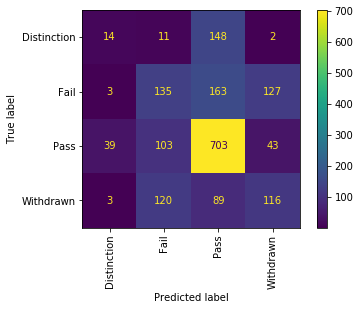

In [0]:


plot_confusion_matrix(pipeline, encoded_Xval, y_validate, values_format='.0f', xticks_rotation='vertical');

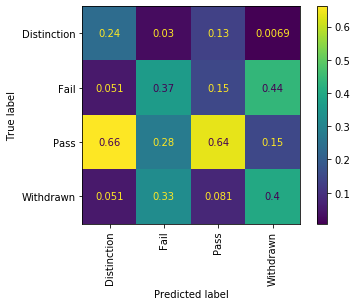

In [0]:
plot_confusion_matrix(pipeline, encoded_Xval, y_validate,  xticks_rotation='vertical', normalize='pred');

In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
scores = pipeline.predict_proba(encoded_Xval)

In [0]:
roc_auc_score(y_validate, scores, multi_class='ovr', average='macro')

0.7191470287301528

In [0]:
roc_auc_score(y_validate, scores, multi_class='ovr', average='weighted')

0.7226235458004012

In [0]:
from sklearn.preprocessing import label_binarize

In [0]:
from sklearn.metrics import roc_curve, auc

In [0]:
y_binarized = label_binarize(y_validate, classes=['Pass', 'Withdrawn', 'Fail', 'Distinction'])

In [0]:
n_classes = y_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_binarized.ravel(), scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

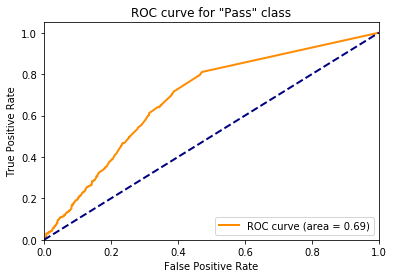

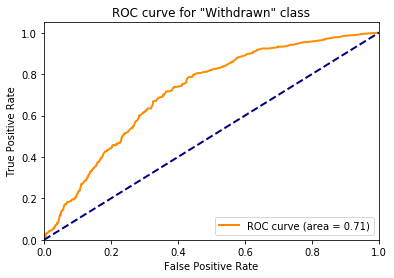

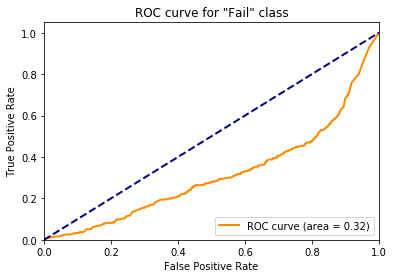

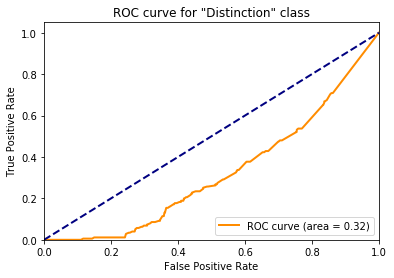

In [0]:
#plot_num = 221
for i in range(4):  #plot the ROC curve for all four classes
  title_labels = ['Pass', 'Withdrawn', 'Fail', 'Distinction']
  plt.figure()
  lw = 2

  #plt.subplot(plot_num)
  plt.plot(fpr[i], tpr[i], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve for "'+title_labels[i]+ '" class')
  plt.legend(loc="lower right")
  #plot_num+=1
  plt.show()

  

In [0]:
ord_encoder = OrdinalEncoder()

In [0]:
encoded_X_train = ord_encoder.fit_transform(X_pre_split)
# encoded_X_test = ord_encoder.fit_transform(X_test)

In [0]:
model = xgb.XGBClassifier(
    n_estimators=1000, 
    max_depth=7,       
    learning_rate=0.5, 
    n_jobs=-1
)

eval_set = [(encoded_X_train, y_pre_split), 
            (encoded_Xval, y_validate)]

model.fit(encoded_X_train, y_pre_split, 
          eval_set=eval_set, 
          eval_metric='mlogloss',  #metric for multi-class labels
          early_stopping_rounds=50) 

[0]	validation_0-mlogloss:1.10449	validation_1-mlogloss:1.17278
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:0.974564	validation_1-mlogloss:1.08448
[2]	validation_0-mlogloss:0.900474	validation_1-mlogloss:1.03682
[3]	validation_0-mlogloss:0.851828	validation_1-mlogloss:1.01496
[4]	validation_0-mlogloss:0.817711	validation_1-mlogloss:1.00525
[5]	validation_0-mlogloss:0.791989	validation_1-mlogloss:1.0042
[6]	validation_0-mlogloss:0.767119	validation_1-mlogloss:1.00771
[7]	validation_0-mlogloss:0.751727	validation_1-mlogloss:1.00724
[8]	validation_0-mlogloss:0.741629	validation_1-mlogloss:1.00856
[9]	validation_0-mlogloss:0.730869	validation_1-mlogloss:1.01385
[10]	validation_0-mlogloss:0.722389	validation_1-mlogloss:1.01369
[11]	validation_0-mlogloss:0.71333	validation_1-mlogloss:1.01601
[12]	validation_0-mlogloss:0.705046	validation_1-mlogl

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
model.score(encoded_Xval, y_validate)

0.5618471687740517

In [0]:
0.5618471687740517-0.48309

0.0787571687740517

Using XGBClassifier, the model performs **10.2%** better than the baseline prediction 





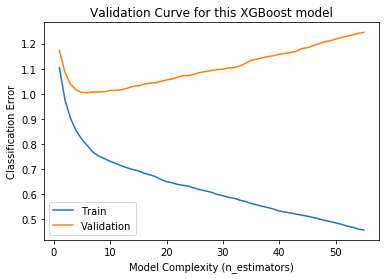

In [0]:
results = model.evals_result()
train_error = results['validation_0']['mlogloss']
val_error = results['validation_1']['mlogloss']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')
#plt.ylim((0.18, 0.22)) # Zoom in
plt.legend();

In [0]:
min_error = np.array(results['validation_1']['mlogloss']).min()

In [0]:
results['validation_1']['mlogloss'].index(min_error)

5

###Based on the chart and list of "mlogloss" errors, the model begins to lose predictive value after about 6 estimators.  This suggests that the unrefined version of my dataset (that is, the dataset without feature engineering) should have the following parameter:

```
n_estimators=6
```



###Todo:

- [ ] Discuss how my model's predictions compare with the baseline of the majority class
- [ ] Interpret the ROC curve and its implications for each class prediction
- [ ] Speculate on how to improve model predictions such as by:
  - Combining "distinction" with "pass" 
  - dropping Withdrawn (withdrawing from a class may be a poor indicator of whether a student was a high or low performer and thus may not fit well with other class predictions
  - merging other csv files to so that more features are added.
  - dropping the high-cardinality column ("id_student") 



In [0]:
no_withdrawn_temp = grades.query("final_result != 'Withdrawn'")  

#remove withdrawn rows from unshuffled dataset 

# train_pre_split = pre_split.head(train_row_size)
# validate = pre_split.tail(test_row_size)
# y_pre_split = train_pre_split.final_result
# X_pre_split = train_pre_split.drop(y_pre_split.name, axis=1)

# y_validate = validate.final_result
# X_validate = validate.drop(y_validate.name, axis=1)

In [0]:
temp_train = train_pre_split.query("final_result != 'Withdrawn'")
#original shuffled train dataframe with "withdrawn" rows removed
temp_validate = validate.query("final_result != 'Withdrawn'")
#original shuffled train dataframe with "withdrawn" rows removed


In [0]:
temp_train.append(temp_validate)

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,final_result,date,sum_click
7350,2,4,F,East Anglian Region,2,5,0-35,0,N,Fail,4.0,4.0
3633,2,2,F,London Region,4,9,0-35,0,N,Distinction,8.0,7.0
7206,2,4,F,East Anglian Region,3,8,0-35,0,N,Pass,4.0,4.0
6276,2,3,F,Wales,3,10,0-35,2,Y,Fail,5.0,5.0
530,1,4,M,East Midlands Region,3,2,35-55,0,N,Pass,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,2,3,F,Yorkshire Region,4,9,0-35,0,N,Fail,4.0,4.0
1941,2,1,M,West Midlands Region,3,7,0-35,0,N,Pass,7.0,6.0
3743,2,2,F,Yorkshire Region,4,7,35-55,0,N,Pass,8.0,7.0
8575,2,4,F,West Midlands Region,2,7,35-55,0,N,Pass,6.0,6.0


In [0]:
no_withdrawn_temp.shape, temp_train.append(temp_validate).shape

((5917, 12), (5917, 12))

In [0]:
no_withdrawn = temp_train.append(temp_validate)

In [0]:
no_withdrawn.final_result.value_counts(normalize=True) #new baselines

Pass           0.594051
Fail           0.286294
Distinction    0.119655
Name: final_result, dtype: float64

In [0]:
ynw_train = temp_train.final_result
Xnw_train = temp_train.drop(ynw_train.name, axis=1)

ynw_test = temp_validate.final_result
Xnw_test = temp_validate.drop(ynw_train.name, axis=1)

In [0]:
# Xnw_train, Xnw_test, ynw_train, ynw_test = train_test_split(X_nw, y_nw, random_state=99, test_size=.2)

In [0]:
pipeline2 = make_pipeline(OrdinalEncoder(), RandomForestClassifier())

In [0]:
pipeline2.fit(Xnw_train, ynw_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'region', 'age_band',
                                      'disability'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': F      1
M      2
NaN   -2
dtype: int64},
                                         {'col': 'region',
                                          'data_type': dtype('O'),
                                          'mapping': East Anglian Region      1
London Region            2
Wales                    3
East Mid...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_d

In [0]:
pipeline2.score(Xnw_test, ynw_test)

0.6673373574782026

In [0]:
0.6673373574782026 - .594051

0.07328635747820256

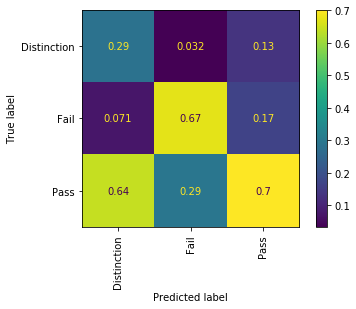

In [0]:
plot_confusion_matrix(pipeline2, Xnw_test, ynw_test,  xticks_rotation='vertical', normalize='pred');

With the "Withdrawn" class dropped, the RFC model performs **7.3%** better than the baseline prediction (0.717639 - 0.594051)

In [0]:
#forced error

In [0]:
temp_train.final_result = temp_train.final_result.replace("Distinction", "Pass")
#original shuffled train dataframe with "withdrawn" rows removed
temp_validate.final_result = temp_validate.final_result.replace("Distinction", "Pass")
#original shuffled train dataframe with "withdrawn" rows removed

In [0]:
temp_train.append(temp_validate).final_result.value_counts(normalize=True) #new baselines

Pass    0.713706
Fail    0.286294
Name: final_result, dtype: float64

In [0]:
#"pf" means "pass-fail because there are only two categories now"
ypf_train = temp_train.final_result   
Xpf_train = temp_train.drop(ynw_train.name, axis=1)

ypf_test = temp_validate.final_result
Xpf_test = temp_validate.drop(ynw_train.name, axis=1)

In [0]:
# pass_fail = no_withdrawn
# #combine the "Distinction" and "Pass" Categories
# pass_fail.final_result.value_counts(normalize=True)  #new baselines

In [0]:
# y_pf = pass_fail.final_result
# X_pf = pass_fail.drop(y_pf.name, axis=1)

In [0]:
# Xpf_train, Xpf_test, ypf_train, ypf_test = train_test_split(X_pf, y_pf, random_state=99, test_size=.25)

In [0]:
pipeline3 = make_pipeline(OrdinalEncoder(), RandomForestClassifier())
pipeline3.fit(Xpf_train, ypf_train)
pipeline3.score(Xpf_test, ypf_test)

0.8115358819584172

In [0]:
0.8115358819584172 - 0.713706

0.09782988195841724

In [0]:
y_pred_pf = pipeline3.predict(Xpf_test)

With the "Distinction" merged with "Pass", the model performs <b>9.8% better</b> than the baseline prediction 

---



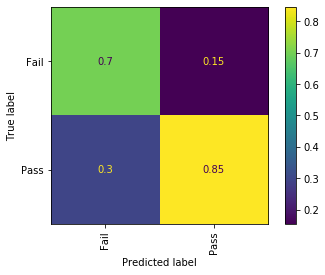

In [0]:
plot_confusion_matrix(pipeline3, Xpf_test, ypf_test,  xticks_rotation='vertical', normalize='pred');

In [0]:
from pprint import pprint

pprint(classification_report(ypf_test, y_pred_pf))


('              precision    recall  f1-score   support\n'
 '\n'
 '        Fail       0.70      0.60      0.64       428\n'
 '        Pass       0.85      0.90      0.87      1063\n'
 '\n'
 '    accuracy                           0.81      1491\n'
 '   macro avg       0.77      0.75      0.76      1491\n'
 'weighted avg       0.81      0.81      0.81      1491\n')


###Pickle Pipeline in preparation for display Dash app

In [0]:
from joblib import dump
dump(pipeline3, 'pipeline.joblib', compress=True)



['pipeline.joblib']

In [0]:
import joblib
import sklearn
import category_encoders as ce
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')


joblib==0.14.1
scikit-learn==0.22.1
category_encoders==2.1.0


In [0]:
# pipenv install joblib==0.14.1
# pipenv install scikit-learn==0.22.1
# pipenv install category_encoders==2.1.0

In [0]:
encoder_roc = OrdinalEncoder()
encoded_Xpf_test = encoder_roc.fit_transform(Xpf_test)

In [0]:
Xpf_test.shape, ypf_test.shape

((1491, 11), (1491,))

In [0]:
plt.rcParams['figure.dpi'] = 72

In [0]:
!pip install pdpbox
!pip install shap

In [0]:

encoder_pdp = OrdinalEncoder()
Xpf_encoded = encoder_pdp.fit_transform(Xpf_train)

model_pdp = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_pdp.fit(Xpf_encoded, ypf_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

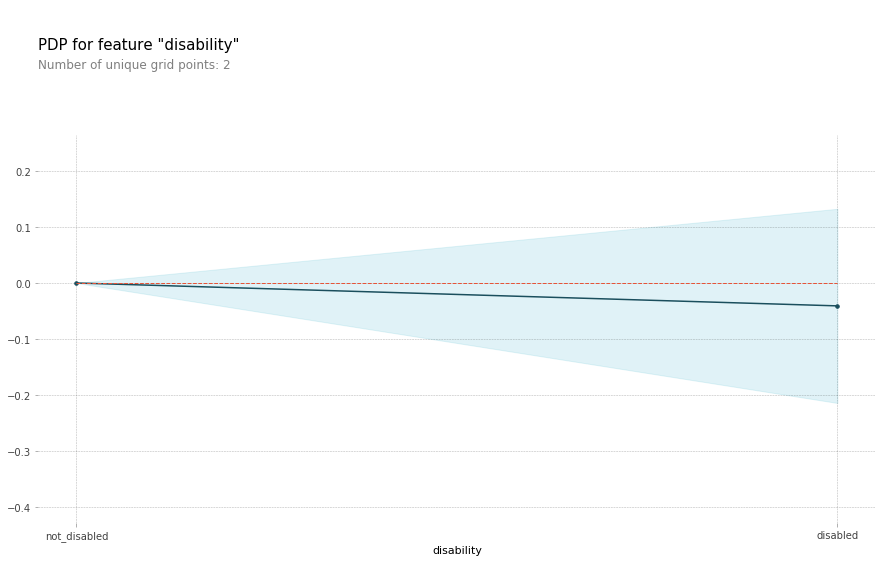

In [0]:


from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'disability'

isolated = pdp_isolate(
    model=model_pdp, 
    dataset=Xpf_encoded, 
    model_features=Xpf_encoded.columns, 
    feature=feature
)
pdp_plot(isolated, feature)
plt.xticks([1, 2], ['not_disabled', 'disabled']);
# # Use Pdpbox
# %matplotlib inline
# import matplotlib.pyplot as plt
# from pdpbox import pdp
# feature = 'sex'
# pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
# pdp.pdp_plot(pdp_dist, feature);

In [0]:
encoder_pdp.mapping

[{'col': 'gender', 'data_type': dtype('O'), 'mapping': F      1
  M      2
  NaN   -2
  dtype: int64},
 {'col': 'region',
  'data_type': dtype('O'),
  'mapping': East Anglian Region      1
  London Region            2
  Wales                    3
  East Midlands Region     4
  North Region             5
  South East Region        6
  North Western Region     7
  South West Region        8
  Yorkshire Region         9
  West Midlands Region    10
  Scotland                11
  South Region            12
  Ireland                 13
  NaN                     -2
  dtype: int64},
 {'col': 'age_band', 'data_type': dtype('O'), 'mapping': 0-35     1
  35-55    2
  55<=     3
  NaN     -2
  dtype: int64},
 {'col': 'disability', 'data_type': dtype('O'), 'mapping': N      1
  Y      2
  NaN   -2
  dtype: int64}]

In [0]:
encoder_shap = OrdinalEncoder()
encoded_Xpf_train = encoder_shap.fit_transform(Xpf_train)
encoded_Xpf_test  = encoder_shap.fit_transform(Xpf_test)

In [0]:
from scipy.stats import randint, uniform


param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestClassifier(random_state=99), 
    param_distributions=param_distributions, 
    n_iter=8, 
    cv=2, 
    scoring='roc_auc', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=99
)

search.fit(encoded_Xpf_train, ypf_train);

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    5.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:    6.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    6.5s finished


In [0]:
#sorted(sklearn.metrics.SCORERS.keys())
print('Best hyperparameters', search.best_params_)
print('Cross-validation AUC-ROC', search.best_score_)
best_est = search.best_estimator_

Best hyperparameters {'max_depth': 10, 'max_features': 0.36050726453927373, 'n_estimators': 129}
Cross-validation AUC-ROC 0.8421893434919112


In [0]:
best_est.score(encoded_Xpf_test, ypf_test)

0.8256203890006707

In [0]:
0.8256203890006707 - 0.713706

0.11191438900067074

With the "Distinction" merged with "Pass" and by using RandomizedSearchCV, the model performs <b>11.19% better</b> than the baseline prediction

In [0]:
row = encoded_Xpf_test.iloc[[5]]
row

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,date,sum_click
6849,2,4,1,6,3,3,1,0,1,3.0,3.0


In [0]:
best_est.predict(row)

array(['Fail'], dtype=object)

In [0]:
import shap

explainer = shap.TreeExplainer(best_est)
shap_values = explainer.shap_values(row)



In [0]:
shap_values

[array([[-0.00484491, -0.1576185 , -0.00442969, -0.00433163, -0.02055209,
         -0.04970175, -0.00193817, -0.00975038,  0.00129006,  0.28805649,
          0.2129773 ]]),
 array([[ 0.00484491,  0.1576185 ,  0.00442969,  0.00433163,  0.02055209,
          0.04970175,  0.00193817,  0.00975038, -0.00129006, -0.28805649,
         -0.2129773 ]])]

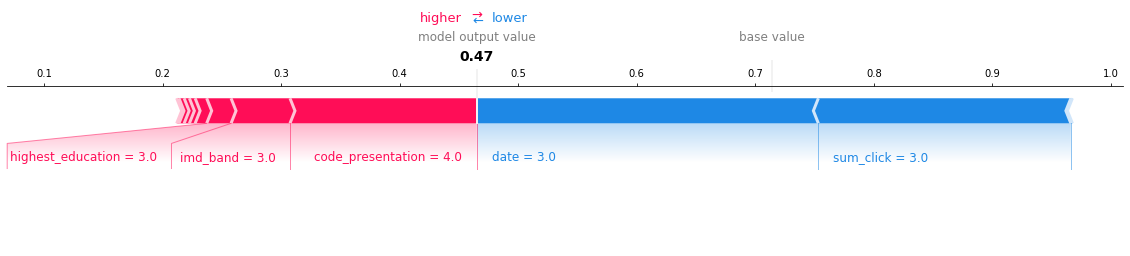

In [0]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1], 
    shap_values=shap_values[1], 
    features=row, 
    show=False,
    matplotlib=True
).savefig('first_shap_plot.png')


In [0]:
best_est.predict(encoded_Xpf_test).tolist().index('Pass')

0

In [0]:
row = encoded_Xpf_test.iloc[[0]]
row

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,date,sum_click
8367,2,4,1,6,2,6,2,0,2,6.0,6.0


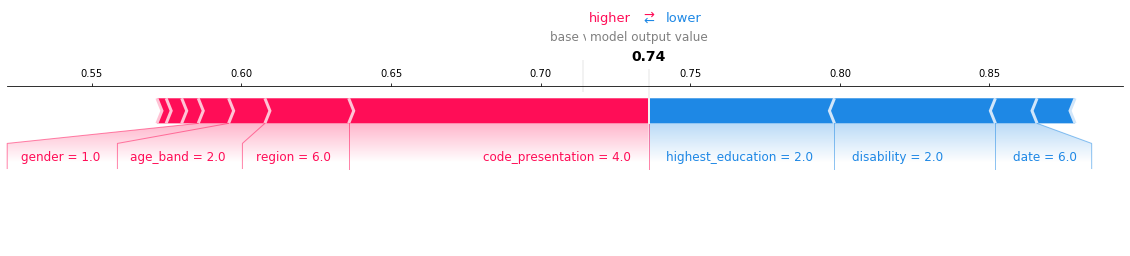

In [0]:
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1], 
    shap_values=shap_values[1], 
    features=row, 
    show=False,
    matplotlib=True
).savefig('first_shap_plot.png')

In [0]:
pass_fail = temp_train.append(temp_validate).reset_index(drop=True)

In [0]:
pass_fail.columns

Index(['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'disability', 'final_result', 'date', 'sum_click'],
      dtype='object')

In [0]:
pass_fail.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,final_result,date,sum_click
0,2,4,F,East Anglian Region,2,5,0-35,0,N,Fail,4.0,4.0
1,2,2,F,London Region,4,9,0-35,0,N,Pass,8.0,7.0
2,2,4,F,East Anglian Region,3,8,0-35,0,N,Pass,4.0,4.0
3,2,3,F,Wales,3,10,0-35,2,Y,Fail,5.0,5.0
4,1,4,M,East Midlands Region,3,2,35-55,0,N,Pass,7.0,6.0


In [0]:
pass_fail.columns

Index(['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'disability', 'final_result', 'date', 'sum_click'],
      dtype='object')

In [0]:
# pass_fail.to_csv("open_learning_analytics_kaggle.csv",index=False)

# pd.read_csv('open_learning_analytics_kaggle.csv')

<h2>References</h2>

<p>Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017).</p>

<p>----References for determining an Evaluation metric for multi-class classfication and/or learning analytics/educational data mining--------</p>
<p>Umer r.umer@massey.ac.nz, R., Susnjak, T., Mathrani, A., & Suriadi, S. (2017). On predicting academic performance with process mining in learning analytics. Journal of Research in Innovative Teaching, 10(2), 160–176. Retrieved from http://10.0.4.84/JRIT-09-2017-0022 </p>

<p>Sokolova, M., & Lapalme, G. (2009). A systematic analysis of performance measures for classification tasks. Information Processing and Management, 45(4), 427–437. https://doi.org/10.1016/j.ipm.2009.03.002</p>

<p>Lu, O. H. T., Huang, A. Y. Q., Huang, J. C. H., Lin, A. J. Q., Ogata, H., & Yang, S. J. H. (2018). Applying learning analytics for the early prediction of students’ academic performance in blended learning. Educational Technology and Society, 21(2), 220–232.</p>